In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltf
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [441]:
df = pd.read_csv('usa_cars_copy.csv')

In [442]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'model', 'model.1', 'year', 'title_status',
       'mileage', 'color', 'vin', 'state'],
      dtype='object')


In [443]:
print(df.isnull().sum())

Unnamed: 0      0
price           0
model           0
model.1         0
year            0
title_status    0
mileage         0
color           0
vin             0
state           0
dtype: int64


In [444]:
df = df.dropna()

In [445]:
df.head(10)

,Unnamed: 0,price,model,model.1,year,title_status,mileage,color,vin,state
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,new jersey
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,tennessee
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,georgia
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,virginia
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,florida
5,5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,texas
6,6,7300,chevrolet,pk,2010,clean vehicle,149050,black,1gcsksea1az121133,georgia
7,7,13350,gmc,door,2017,clean vehicle,23525,gray,1gks2gkc3hr326762,california
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371,silver,1g1zd5st5jf191860,florida
9,9,5250,ford,mpv,2017,clean vehicle,63418,black,2fmpk3j92hbc12542,texas


In [446]:
rename= df.rename(columns={'model.1': 'make'}, inplace=True)
rename

In [447]:
df.head(10)

,Unnamed: 0,price,model,make,year,title_status,mileage,color,vin,state
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,new jersey
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,tennessee
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,georgia
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,virginia
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,florida
5,5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,texas
6,6,7300,chevrolet,pk,2010,clean vehicle,149050,black,1gcsksea1az121133,georgia
7,7,13350,gmc,door,2017,clean vehicle,23525,gray,1gks2gkc3hr326762,california
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371,silver,1g1zd5st5jf191860,florida
9,9,5250,ford,mpv,2017,clean vehicle,63418,black,2fmpk3j92hbc12542,texas


In [448]:
clean_df = df.drop(['Unnamed: 0','title_status', 'vin'], axis=1) 
clean_df

,price,model,make,year,mileage,color,state
0,6300,toyota,cruiser,2008,274117,black,new jersey
1,2899,ford,se,2011,190552,silver,tennessee
2,5350,dodge,mpv,2018,39590,silver,georgia
3,25000,ford,door,2014,64146,blue,virginia
4,27700,chevrolet,1500,2018,6654,red,florida
...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609,red,california
2495,9200,nissan,versa,2018,34553,silver,florida
2496,9200,nissan,versa,2018,31594,silver,florida
2497,9200,nissan,versa,2018,32557,black,florida


In [449]:
clean_df['original_index'] = df.index

In [450]:
#Using pd.get_dummies to one-hot encode categorical variables
clean_df = pd.get_dummies(clean_df, columns=['color', 'state'])


In [451]:
#setting up the features (X) and target variable (y)
features = ['year', 'mileage'] + \
            [col for col in clean_df.columns if col.startswith(('color_', 'state_'))]
X = clean_df[features]
y = clean_df['price']

In [452]:
#Initialize the scaler
scaler = StandardScaler()
#Tranform the scaler
X_scaled = scaler.fit_transform(X)

In [453]:
# Split the data
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X_scaled, y, clean_df.index, test_size=0.2, random_state=42)

In [454]:
feature_importances = model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [455]:
# Fit the model on training data
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [456]:
# Make predictions
y_pred = model.predict(X_test)


In [457]:
# Getting Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 92454596.87474112


In [458]:
# Create a copy of the original test data
df_test = clean_df[clean_df['original_index'].isin(indices_test)].copy()

# Add the predicted prices to the test DataFrame
df_test['Predicted Price'] = y_pred

In [459]:
top_10_expensive = df_test.nlargest(10, 'Predicted Price')

In [460]:
print(top_10_expensive[['model','make', 'year', 'Predicted Price']])


       model      make  year  Predicted Price
368     ford      door  2015     40563.195132
1871    ford  explorer  2017     39381.938978
149     ford   cutaway  2014     35159.612797
2009    ford     doors  2018     34645.836329
1453    ford       max  2019     34549.495458
1263    ford    escape  2018     34134.958807
1192   dodge   charger  2019     33798.951488
2016    ford      door  2012     33783.958221
1547    ford     f-150  2019     33331.079545
2234  nissan     rogue  2019     32916.194460


In [461]:
# Define hyperparameter grid
parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [462]:
# Best hyperparameters and model
print(f'Best Parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [463]:
# Make predictions
y_pred_best = best_model.predict(X_test)


# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with Best Model: {mse_best}')

Mean Squared Error with Best Model: 89509876.91706415


In [464]:
df_test['Predicted_Price_Best'] = y_pred_best


In [465]:
top_10_expensive_best = df_test.nlargest(10, 'Predicted_Price_Best')


In [466]:
print(top_10_expensive_best[['model','make', 'year', 'Predicted_Price_Best']])


       model      make  year  Predicted_Price_Best
368     ford      door  2015          42732.288701
1871    ford  explorer  2017          40653.232931
2016    ford      door  2012          36226.911535
1078   dodge      door  2012          34939.157374
1192   dodge   charger  2019          34904.094473
2009    ford     doors  2018          34862.771592
1547    ford     f-150  2019          34718.414687
2234  nissan     rogue  2019          34430.632891
149     ford   cutaway  2014          34228.327676
1263    ford    escape  2018          34061.754942


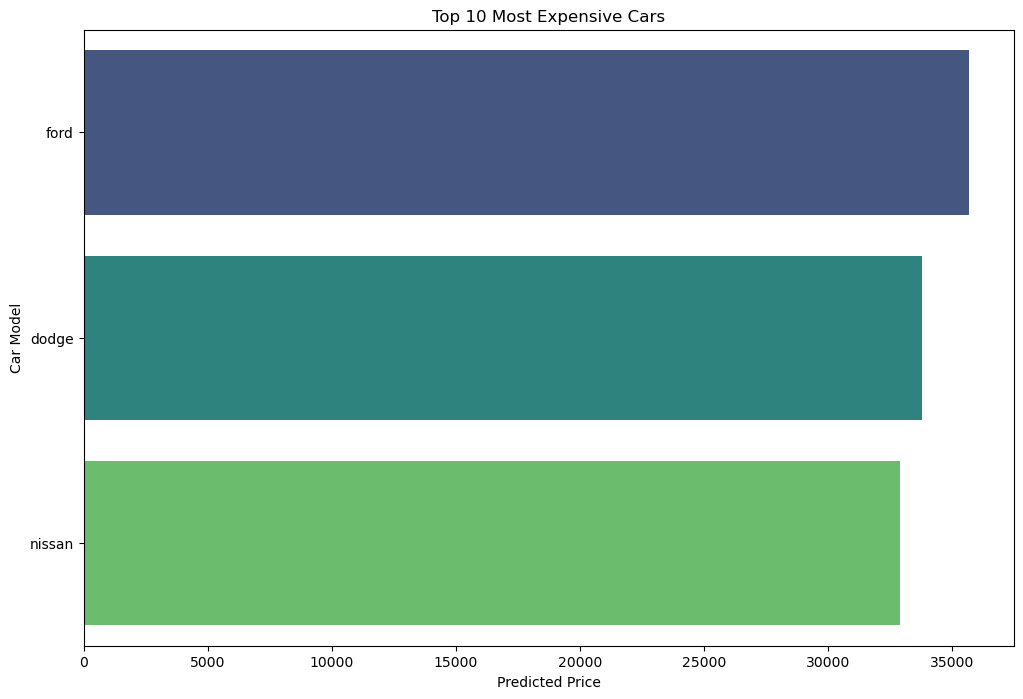

In [467]:
# semi-good cars
plt.figure(figsize=(12, 8))
sns.barplot(x='Predicted Price', y='model', data=top_10_expensive, palette='viridis', errorbar=None)
plt.title('Top 10 Most Expensive Cars')
plt.xlabel('Predicted Price')
plt.ylabel('Car Model')
plt.show()

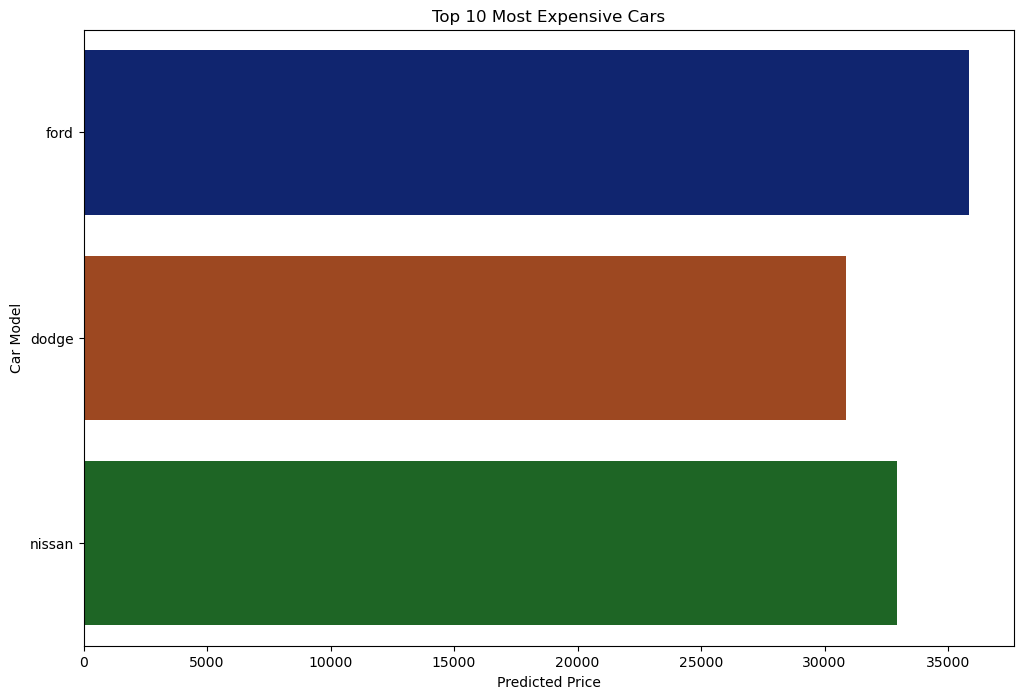

In [468]:
#Most affordable cars
plt.figure(figsize=(12, 8))
sns.barplot(x='Predicted Price', y='model', data=top_10_expensive_best, palette='dark', errorbar=None)
plt.title('Top 10 Most Expensive Cars')
plt.xlabel('Predicted Price')
plt.ylabel('Car Model')
plt.show()

In [469]:
residuals = y_test - y_pred

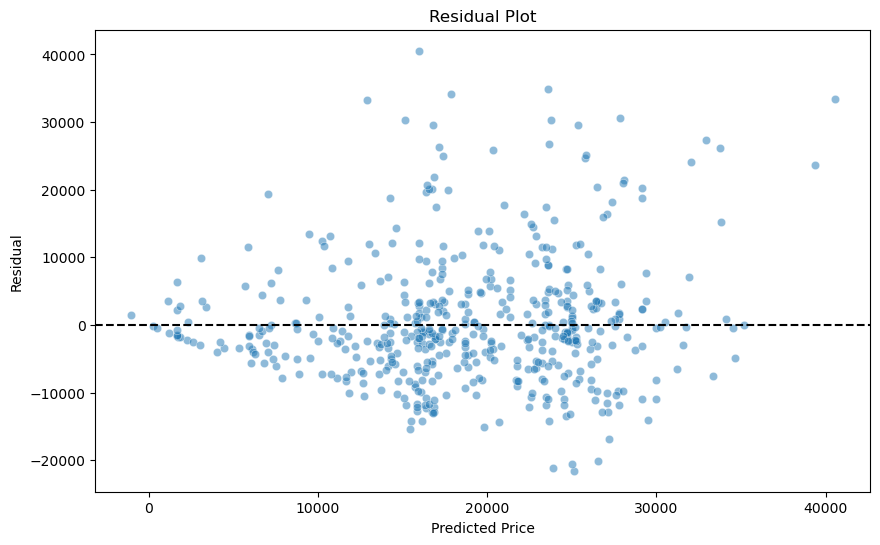

In [470]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.show()

In [471]:
y_test_pred = model.predict(X_test)


/var/folders/c8/_4_n1jxj0dj5byk4q9m98x5w0000gn/T/ipykernel_5812/1547507378.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='r', lw=2)


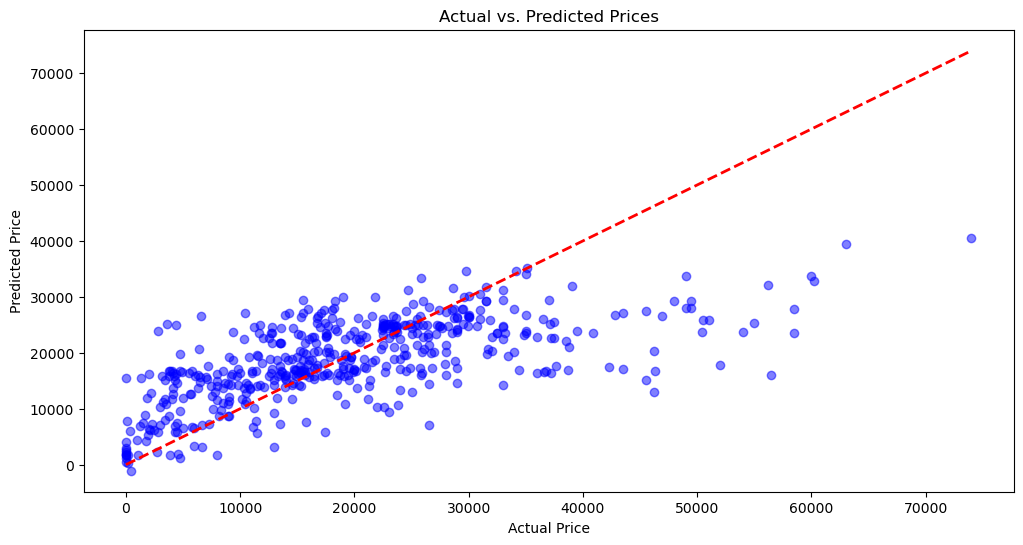

In [472]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='r', lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()